In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter

In [2]:
df = pd.read_csv('../data/01_heights_weights_genders_errors.csv')
df.head()

,Unnamed: 0,Gender,Height,Height errors,Weight,Weight errors
0,0,Male,73.847017,1.685135,241.893563,2.168184
1,1,Male,68.781904,0.367460,162.310473,8.853313
2,2,Male,74.110105,1.494730,212.740856,10.073004
3,3,Male,71.730978,1.525215,220.042470,2.694308
4,4,Male,69.881796,2.871325,206.349801,10.431189


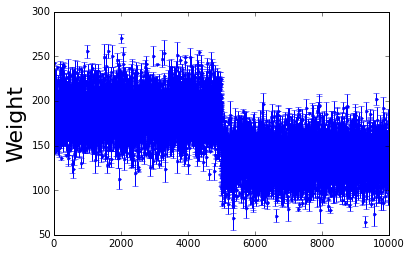

In [7]:
x = df['Height']
y = df['Weight']
yerr = df['Weight errors']
plt.figure(1)
plt.errorbar(range(np.shape(y)[0]), y, yerr=yerr,marker='.',linestyle='None')
plt.ylabel('Weight',fontsize=22)
plt.show()

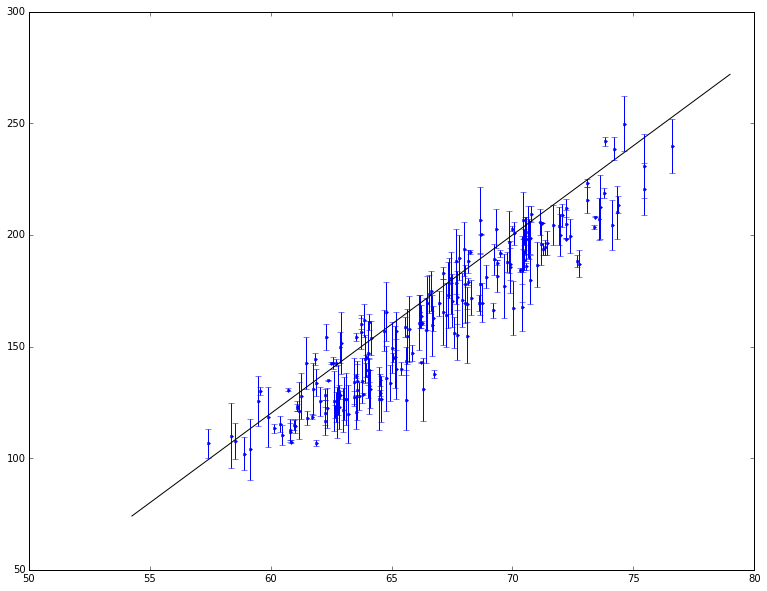

In [31]:
inds = np.arange(0,10000,50)
xsub = x[inds]
ysub = y[inds]
yerrsub = yerr[inds]
#useful plotting tool below:
xlinear = np.sort(x)
model = (8*xlinear)-360

plt.figure(2,figsize=(13,10))
plt.errorbar(xsub,ysub,yerrsub,marker='.',linestyle='None')
plt.plot(xlinear,model,c='k')
plt.show()

In [47]:
def calculatechisquare(model,y,yerr):
    return ((y-model)**2)/(2*yerr**2)
    

In [86]:
aiter = np.arange(0,12,0.5)
biter = np.arange(-1000,500,25)

chisquarearray = np.ones((len(aiter),len(biter)))
for i,a in enumerate(aiter):
    for j,b in enumerate(biter):
        model = a*xlinear + b
        chisquare = 0
        for k in range(len(x)):
            chisquare += calculatechisquare(model[k],y[k],yerr[k])
        chisquarearray[i][j] = chisquare



In [87]:
reducedchisquarearray = np.divide(chisquarearray,np.shape(x)[0]-2)
maskx,masky = np.where(reducedchisquarearray == np.amin(reducedchisquarearray))
print reducedchisquarearray.shape
print maskx,masky
print reducedchisquarearray[(maskx,masky)]
print aiter[maskx],biter[masky]

(24, 60)
[0] [46]
[ 160660.53488721]
[ 0.] [150]


<matplotlib.colorbar.Colorbar instance at 0x10eef5098>

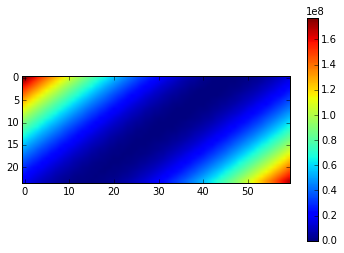

In [88]:
plt.imshow(reducedchisquarearray)
plt.colorbar()